In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from unidecode import unidecode

In [53]:
df = pd.read_csv('/kaggle/input/eng-ru-title-text/eng_title_text_url.csv', sep='\t')

In [54]:
df

,Unnamed: 0,Unnamed: 0.1,title,text,url
0,0,0,'It's definitely weird:' How the Redskins are ...,"From noon to 2 p.m., Jonathan Allen sits in ...",https://www.washingtontimes.com/news/2020/may/...
1,1,2,I had to raise funds to play in All England: M...,"Hyderabad: Way back in 1981, as an 11-year-ol...",https://telanganatoday.com/i-had-to-raise-fund...
2,2,3,Lexar launches NM700 NVMe M.2 series with spee...,"The PCIe Gen3x4 drive features 3D NAND, LDPC a...",https://www.notebookcheck.net/Lexar-launches-N...
3,3,4,"For a Limited Time, Down N’ Out Is Flipping Bu...","When coronavirus shut down the city, Down N’ O...",https://www.broadsheet.com.au/sydney/food-and-...
4,4,7,Full Text: Akufo-Addo’s speech at 2020 virtual...,Click to read all about coronavirus → \n ...,https://www.ghanaweb.com/GhanaHomePage/NewsArc...
...,...,...,...,...,...
48734,48734,109102,Trump says terminating U.S. relationship with ...,U.S. President Donald Trump on Friday said he ...,https://www.unian.info/world/u-s-relations-wit...
48735,48735,109105,"Report: UFC, Reebok could ‘part ways’ as contr...",The sponsorship deal between Ultimate Fighting...,https://www.mmamania.com/2020/5/29/21274980/re...
48736,48736,109106,U.S. Oil Production Rebound Off The Lows With ...,Summary \n Welcome to the US oil produ...,https://seekingalpha.com/article/4351002-u-s-o...
48737,48737,109108,Former Chicago Bears star S Roosevelt Taylor d...,May 29 (UPI) -- Former Chicago Bears star de...,https://www.upi.com/Sports_News/NFL/2020/05/29...


In [55]:
df.dropna(inplace=True)

In [56]:
from unidecode import unidecode
df['title'] = df['title'].apply(unidecode)
df['text'] = df['text'].apply(unidecode)
df

,Unnamed: 0,Unnamed: 0.1,title,text,url
0,0,0,'It's definitely weird:' How the Redskins are ...,"From noon to 2 p.m., Jonathan Allen sits in ...",https://www.washingtontimes.com/news/2020/may/...
1,1,2,I had to raise funds to play in All England: M...,"Hyderabad: Way back in 1981, as an 11-year-ol...",https://telanganatoday.com/i-had-to-raise-fund...
2,2,3,Lexar launches NM700 NVMe M.2 series with spee...,"The PCIe Gen3x4 drive features 3D NAND, LDPC a...",https://www.notebookcheck.net/Lexar-launches-N...
3,3,4,"For a Limited Time, Down N' Out Is Flipping Bu...","When coronavirus shut down the city, Down N' O...",https://www.broadsheet.com.au/sydney/food-and-...
4,4,7,Full Text: Akufo-Addo's speech at 2020 virtual...,Click to read all about coronavirus - \n ...,https://www.ghanaweb.com/GhanaHomePage/NewsArc...
...,...,...,...,...,...
48734,48734,109102,Trump says terminating U.S. relationship with ...,U.S. President Donald Trump on Friday said he ...,https://www.unian.info/world/u-s-relations-wit...
48735,48735,109105,"Report: UFC, Reebok could 'part ways' as contr...",The sponsorship deal between Ultimate Fighting...,https://www.mmamania.com/2020/5/29/21274980/re...
48736,48736,109106,U.S. Oil Production Rebound Off The Lows With ...,Summary \n Welcome to the US oil produ...,https://seekingalpha.com/article/4351002-u-s-o...
48737,48737,109108,Former Chicago Bears star S Roosevelt Taylor d...,May 29 (UPI) -- Former Chicago Bears star de...,https://www.upi.com/Sports_News/NFL/2020/05/29...


In [57]:
!pip install sentence_transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [58]:
import torch 
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentenceTransformer('sentence-transformers/all-distilroberta-v1').to(device)

batch_size = 4096
embeddings_title = []
embeddings_text = []
num_batches = int(len(df) / batch_size) + 1

with torch.no_grad():
    for i in tqdm(range(num_batches)):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(df))
        batch = df[start_idx:end_idx]
        
        title_batch = list(batch['title'])
        text_batch = list(batch['text'])
        
        title_embeddings = model.encode(title_batch, convert_to_tensor=True, device=device, show_progress_bar=False)
        text_embeddings = model.encode(text_batch, convert_to_tensor=True, device=device, show_progress_bar=False)
        
        embeddings_title.append(title_embeddings.cpu().numpy())
        embeddings_text.append(text_embeddings.cpu().numpy())
        
embeddings_title = np.concatenate(embeddings_title, axis=0)
embeddings_text = np.concatenate(embeddings_text, axis=0)

100%|██████████| 12/12 [06:23<00:00, 31.95s/it]


In [59]:
(embeddings_title.shape, embeddings_text.shape)

((48502, 768), (48502, 768))

<AxesSubplot:ylabel='Count'>

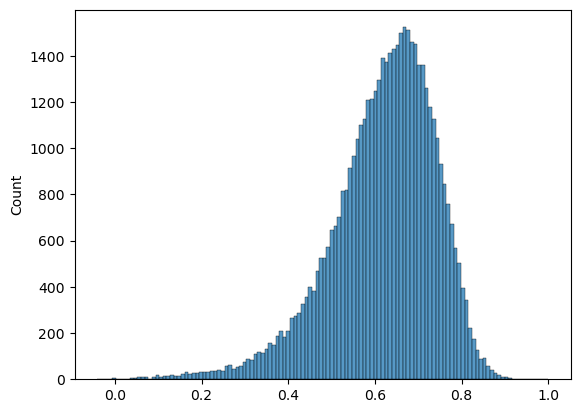

In [60]:
dot_product = np.sum(embeddings_title * embeddings_text, axis=1)

# Compute the norms of embeddings_title and embeddings_text
norm_title = np.sqrt(np.sum(embeddings_title ** 2, axis=1))
norm_text = np.sqrt(np.sum(embeddings_text ** 2, axis=1))

# Compute the cosine similarity between each pair of embeddings
cos_sim = dot_product / (norm_title * norm_text)

# Print the cosine similarity between the first 10 pairs of embeddings
sns.histplot(cos_sim)

In [61]:
def cosine_sim (v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

randomly_concatenated = []
full_embeds = []
for i in range(48502):
    r = np.random.randint(0, 2)
    if r == 0:
        x = np.concatenate((embeddings_text[i, :], embeddings_title[i, :]))
        full_embeds.append(x)
        randomly_concatenated.append(0)
    elif r == 1:
        x = np.concatenate((embeddings_title[i, :], embeddings_text[i, :]))
        full_embeds.append(x)
        randomly_concatenated.append(1)
        
i = 0
while i < 12500:
    a = np.random.randint(0, 48502)
    b = np.random.randint(0, 48502)
    if (cosine_sim(embeddings_text[a, :], embeddings_text[b, :]) > 0.3):
        continue
    x = np.concatenate((embeddings_text[a, :], embeddings_text[b, :]))
    full_embeds.append(x)
    randomly_concatenated.append(2)
    i += 1
    
i = 0
while i < 12500:
    a = np.random.randint(0, 48502)
    b = np.random.randint(0, 48502)
    if (cosine_sim(embeddings_title[a, :], embeddings_title[b, :]) > 0.3):
        continue
    x = np.concatenate((embeddings_title[a, :], embeddings_title[b, :]))
    full_embeds.append(x)
    randomly_concatenated.append(2)
    i += 1

По существу получилось, что у нас 24 тысячи нулей и единиц и 24 тысячи двоек.

In [62]:
randomly_concatenated = np.array(randomly_concatenated)
full_embeds = np.array(full_embeds)

In [63]:
(randomly_concatenated.shape, full_embeds.shape)

((73502,), (73502, 1536))

<AxesSubplot:ylabel='Count'>

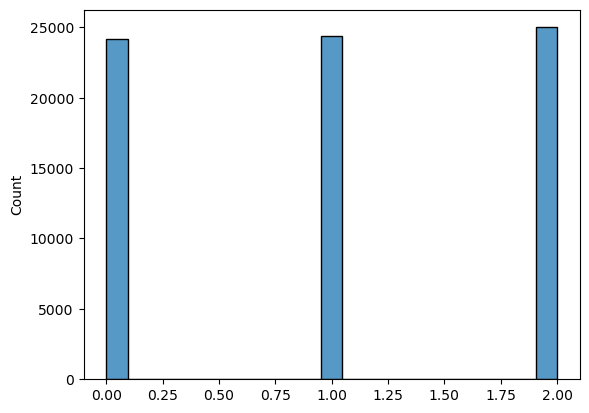

In [64]:
sns.histplot(randomly_concatenated)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(full_embeds, randomly_concatenated, test_size=0.2, random_state=42)

# create the models
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# fit the models to the training data and print the accuracy score for each model on the test set
lr.fit(X_train, y_train)
accuracy_lr = lr.score(X_test, y_test)
print("Logistic Regression Accuracy on test set: {:.2f}%".format(accuracy_lr * 100))

Logistic Regression Accuracy on test set: 95.02%


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Epoch 15 - Train Loss: 0.5544 - Test Loss: 0.5653 - Accuracy: 98.69%


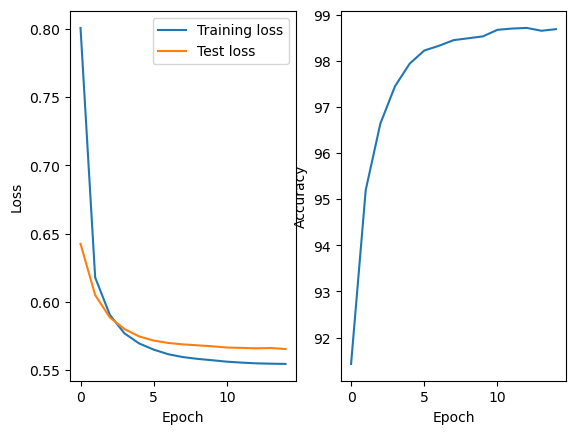

In [67]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch import nn
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import matplotlib.pyplot as plt

# check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# convert the data to PyTorch tensors
X = torch.tensor(full_embeds, dtype=torch.float32)
y = torch.tensor(randomly_concatenated)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
batch_size = 1024
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1536, 512)
        self.relu1 = nn.ReLU(inplace=True)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU(inplace=True)
        self.fc3 = nn.Linear(256, 3)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# create the MLP model and move it to the device
mlp = MLP().to(device)

# define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3)

# train the model
num_epochs = 15
train_losses = []
test_losses = []
accuracies = []
for epoch in range(num_epochs):
    # train the model
    train_loss = 0.0
    mlp.train()
    for batch_x, batch_y in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}"):
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        pred = mlp(batch_x)
        loss = criterion(pred, batch_y)

        # calculate the gradients and update the weights
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # evaluate the model on the test set
    test_loss = 0.0
    total = 0
    correct = 0
    mlp.eval()
    with torch.no_grad():
        for batch_x, batch_y in test_dataloader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)

            pred = mlp(batch_x)
            loss = criterion(pred, batch_y)

            test_loss += loss.item()

            # calculate accuracy
            _, predicted = torch.max(pred.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()

    train_losses.append(train_loss / len(train_dataloader))
    test_losses.append(test_loss / len(test_dataloader))
    accuracy = 100.0 * correct / total
    accuracies.append(accuracy)
    clear_output()
    print(f"Epoch {epoch + 1} - Train Loss: {train_losses[-1]:.4f} - Test Loss: {test_losses[-1]:.4f} - Accuracy: {accuracy:.2f}%")
    # plot the training and test losses
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Training loss")
    plt.plot(test_losses, label="Test loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # plot the accuracies
    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    # display the plot
    plt.show()
    